In [1]:
# 필요 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#출력 그림 크기 조절
sns.set(rc={'figure.figsize':(12,12)})
plt.style.use('ggplot')
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import warnings
warnings.filterwarnings("ignore")
import datetime as dt

### 세종사전 실행
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud
twitter = Twitter()

In [2]:
today = '0916'

In [3]:
df_sns = pd.read_csv("sns데이터/sns통합.csv",encoding = 'cp949')
df_sns

,아이디,날짜,내용
0,@Th0masm0re,2017-10-10,청와대 국민소통 광장 국민청원
1,@_iScent_,2017-10-10,청와대 국민청원
2,@xiu2_xiu2,2017-10-10,아 저 국민청원
3,@ansun9788,2017-10-10,청와대 국민소통 광장 국민청원 국민청원 이명박 제조사 원합니다
4,@s17221,2017-10-10,일베싸이트 폐지 국민청원
...,...,...,...
93639,@cpflrhkddl1,2021-01-01,자가격리 윤일병사망사건 안예은 국방부 일상 청소년 군대군인 강남구 청년 본부장 손수...
93640,@SXct6ccVE2kAQZt,2021-01-01,청와대 국민청원
93641,@SXct6ccVE2kAQZt,2021-01-01,청와대 국민청원
93642,@dgtwt,2021-01-01,코로나 걸려 죽기 전에 굶어 죽는다 자영업자 국민청원 건 육박


In [4]:
df = pd.read_csv("blue_text_0811_13000s.csv",encoding = 'cp949')
df

,Num,Class,Title,Date,Support
0,454161,안전/환경,텔레그램 n번방 용의자 신상공개 및 포토라인 세워주세요,2020-04-17,2715626
1,454160,안전/환경,텔레그램 n번방 가입자 전원의 신상공개를 원합니다,2020-04-19,2026252
2,454159,정치개혁,자유 한국당 정당해산 청원,2019-05-22,1831900
3,454158,기타,문재인 대통령님을 응원 합니다!,2020-03-27,1504597
4,454157,정치개혁,문재인 대통령 탄핵을 촉구합니다.,2020-03-05,1469023
...,...,...,...,...,...
78846,363287,인권/성평등,용산참사 재조사 및 관련자 처벌,2018-02-25,25
78847,363286,교통/건축/국토,"집값 상승의 폭탄, 개포8 단지 분양에 실거주 의무기간을 삽입해주세요",2018-03-28,25
78848,363285,문화/예술/체육/언론,"라이브 뷰잉에서 믹스, 이엣타이가 등을 넣는 사람들을 엄중 처벌 해주세요",2018-03-28,25
78849,363284,행정,정형식 판사 파면을 촉구합니다.,2018-03-08,25


In [5]:
def word_cloud(text,r,cs):

    ### 단어리스트 만들기
    word_list= text.to_list()
    ### 형태소 분리
    sentences_tag = []

    for sentence in word_list:
       morph = twitter.pos(sentence)
       sentences_tag.append(morph)
    
    ## 명사만 추출
    noun_list = []
    for sentence in sentences_tag:
       for word, tag in sentence:
           if tag in ['Noun']:
               noun_list.append(word)
                
    ## 두 단어 이상만 추출
    len(noun_list)

    noun_list = [n for n in noun_list if len(n) > 1]
    noun_list[:100]
    
    # 불용어 제거
    stopwords = ["청원", '처벌', '대한', '요청', '반대', '국민', '사건', '조사', '촉구', '요구', '불법', '대한민국', '개선', '관련'
             ,'한국','청와대',"뉴스","대한민국",]## 뉴스 제거


    noun_list = [i for i in noun_list if i not in stopwords]
    #print(word_list)
    counts = Counter(noun_list)
    tags = counts.most_common(20)

    
    ### WordCloud 생성
    wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      background_color='white',
                      width=800,
                      height=600)
    
    df_tag = pd.DataFrame(data = tags)
#    df_tag.to_csv("relation/{}_{}.csv".format(cs.split("/")[0],r),index = False, encoding = "cp949")
    display(df_tag[:10].T)
    display(df_tag[10:].T)
    print()
    
    cloud = wordcloud.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()
    
    new_data = []
    for i_1 in df_tag[0].unique():
        for i_2 in range(int(df_tag.loc[df_tag[0] == i_1,1])):
            new_data.append(i_1)
    df_new = pd.DataFrame(data = new_data)
    df_new.loc[:,"기간"] = '기간_{}'.format(r)
    display(df_new)
    return df_new

In [6]:
def wc_0908(df1,df2,cs):
    ### 분류명 cs의 top 분류 선정
    temp = df1.loc[df1.Class == cs]
    temp = temp.loc[temp.Support == temp.Support.max()]
    display(temp)
    print()
    
    ddd = "날짜"
    ttt = "내용"
    
    word_r = pd.DataFrame()
    ## 기간 설정
    temp.Date = pd.to_datetime(temp.Date)
    df2[ddd] = pd.to_datetime(df2[ddd])
    starta = temp.Date -  dt.timedelta(days=61)
    startb = temp.Date - dt.timedelta(days=31)
    startc = temp.Date
    finishc = temp.Date + dt.timedelta(days=31)
    
    display(starta,startb,startc,finishc)
    print()
    
    df_A = df2.loc[df2[ddd].values >= starta.values]
    df_A = df_A.loc[df_A[ddd].values <=startb.values,[ddd,ttt]]
    print(cs, "분야의 청원 작성일 -1일 부터 -30일까지(기간A) {}건 워드클라우드".format(df_A[ttt].count()))
    print()
    if df_A[ttt].count() != 0:
        temp_A = word_cloud(df_A[ttt],'A',cs)
    
    print()
    df_B = df2.loc[df2[ddd].values>startb.values]
    df_B = df_B.loc[df_B[ddd].values <=startc.values,[ddd,ttt]]
    print(cs, "분야의 청원 작성일 당일 부터 +30일까지(기간B) {}건 워드클라우드".format(df_B[ttt].count()))
    print()
    if df_B[ttt].count() != 0:
        temp_B = word_cloud(df_B[ttt],'B',cs)
    
    print()
    df_C = df2.loc[df2[ddd].values>startc.values]
    df_C = df_C.loc[df_C[ddd].values <=finishc.values,[ddd,ttt]]
    print(cs, "분야의 청원 완료일 +1일 부터 +30일까지(기간C) {}건 워드클라우드".format(df_C[ttt].count()))
    print()
    if df_C[ttt].count() != 0:
        temp_C = word_cloud(df_C[ttt],'C',cs)
        
    temp_All = pd.concat([temp_A,temp_B,temp_C],axis=0)
    temp_All = temp_All.loc[:,["기간",0]]
    temp_All = temp_All.rename(columns={0 : "단어"})
    display(temp_All)
#   temp_All.단어 = temp_All.apply(lambda x : x["단어"].split("\'")[1],axis=1)
#    temp_All.to_csv("relation/{}_{}_30.csv".format(cs.split("/")[0],today),index = False, encoding = "cp949")


,Num,Class,Title,Date,Support
136,454025,경제민주화,삼성증권 시스템 규제와 공매도 금지,2018-05-06,242286


136   2018-03-06
Name: Date, dtype: datetime64[ns]

136   2018-04-05
Name: Date, dtype: datetime64[ns]

136   2018-05-06
Name: Date, dtype: datetime64[ns]

136   2018-06-06
Name: Date, dtype: datetime64[ns]


경제민주화 분야의 청원 작성일 -1일 부터 -30일까지(기간A) 2977건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,장자연,돌파,여옥,다음,소통,대위,위증,광장,일베,자매
1,459,420,318,309,288,278,265,262,236,229


,10,11,12,13,14,15,16,17,18,19
0,징계,세월호,청문회,자살,죽음,규명,진실,동참,수사,참여
1,216,214,206,186,184,175,172,164,154,153


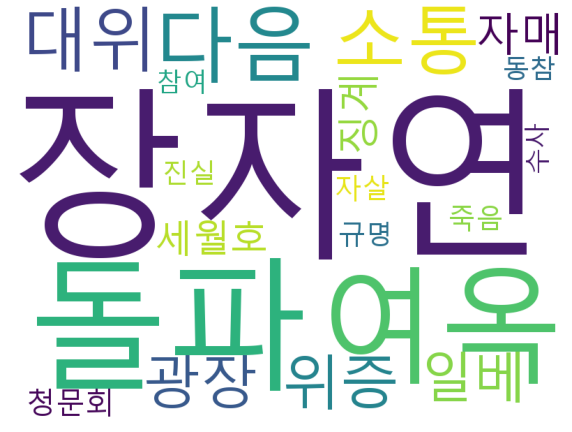

,0,기간
0,장자연,기간_A
1,장자연,기간_A
2,장자연,기간_A
3,장자연,기간_A
4,장자연,기간_A
...,...,...
4883,참여,기간_A
4884,참여,기간_A
4885,참여,기간_A
4886,참여,기간_A



경제민주화 분야의 청원 작성일 당일 부터 +30일까지(기간B) 3319건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,국회의원,다음,소통,광장,조선,전수,돌파,취소,출처,네이버
1,317,281,250,240,240,237,205,180,177,176


,10,11,12,13,14,15,16,17,18,19
0,삼성,참여,단독,판사,허가,종편,폭행,전달,대위,파면
1,171,165,161,160,159,154,153,146,144,139


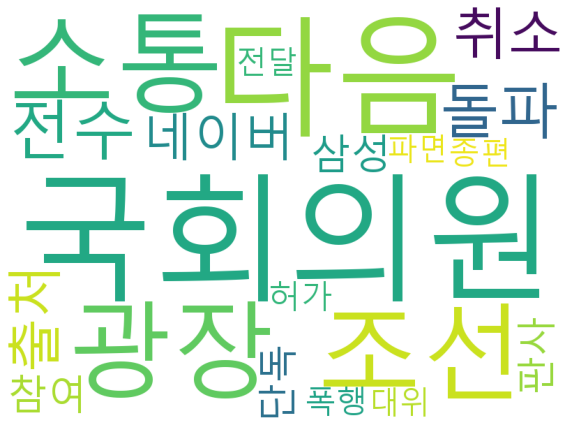

,0,기간
0,국회의원,기간_B
1,국회의원,기간_B
2,국회의원,기간_B
3,국회의원,기간_B
4,국회의원,기간_B
...,...,...
3850,파면,기간_B
3851,파면,기간_B
3852,파면,기간_B
3853,파면,기간_B



경제민주화 분야의 청원 완료일 +1일 부터 +30일까지(기간C) 2935건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,게시판,대통령,수지,소통,광장,문재인,다음,중단,양예원,동의
1,282,225,222,211,192,148,140,132,130,125


,10,11,12,13,14,15,16,17,18,19
0,판사,수사,논란,국회,매크로,경호,근황,비서,전두환,네이버
1,120,118,115,114,109,109,109,103,97,95


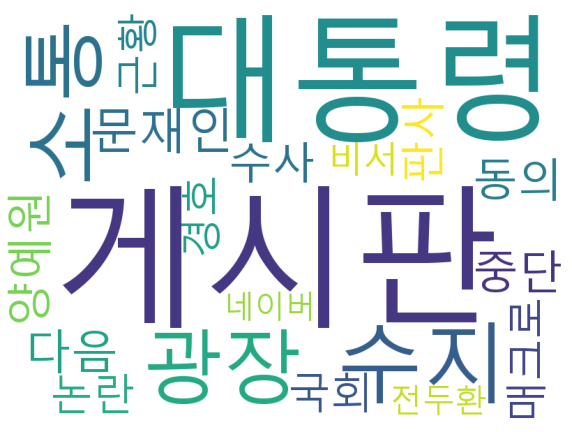

,0,기간
0,게시판,기간_C
1,게시판,기간_C
2,게시판,기간_C
3,게시판,기간_C
4,게시판,기간_C
...,...,...
2891,네이버,기간_C
2892,네이버,기간_C
2893,네이버,기간_C
2894,네이버,기간_C


,기간,단어
0,기간_A,장자연
1,기간_A,장자연
2,기간_A,장자연
3,기간_A,장자연
4,기간_A,장자연
...,...,...
2891,기간_C,네이버
2892,기간_C,네이버
2893,기간_C,네이버
2894,기간_C,네이버


In [21]:
# 경제민주화
wc_0908(df,df_sns,"경제민주화")

,Num,Class,Title,Date,Support
0,454161,안전/환경,텔레그램 n번방 용의자 신상공개 및 포토라인 세워주세요,2020-04-17,2715626


0   2020-02-16
Name: Date, dtype: datetime64[ns]

0   2020-03-17
Name: Date, dtype: datetime64[ns]

0   2020-04-17
Name: Date, dtype: datetime64[ns]

0   2020-05-18
Name: Date, dtype: datetime64[ns]


안전/환경 분야의 청원 작성일 -1일 부터 -30일까지(기간A) 3377건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,문재인,대통령,신천지,탄핵,대구,코로나,응원,경북,돌파,해체
1,1257,1141,1042,898,699,694,624,340,329,319


,10,11,12,13,14,15,16,17,18,19
0,정부,사태,출처,진자,네이버,확진,중국인,조작,검사,중국
1,300,297,291,273,267,228,213,203,199,198


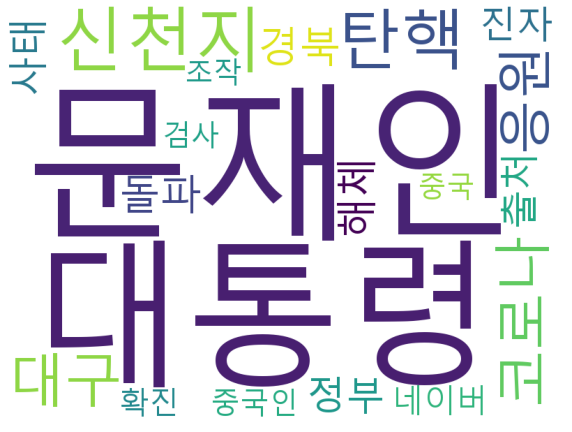

,0,기간
0,문재인,기간_A
1,문재인,기간_A
2,문재인,기간_A
3,문재인,기간_A
4,문재인,기간_A
...,...,...
9807,중국,기간_A
9808,중국,기간_A
9809,중국,기간_A
9810,중국,기간_A



안전/환경 분야의 청원 작성일 당일 부터 +30일까지(기간B) 3037건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,번방,문재인,대통령,코로나,동의,공개,정부,응원,판사,신상
1,791,662,481,375,366,364,325,318,278,245


,10,11,12,13,14,15,16,17,18,19
0,국회,텔레,그램,돌파,다음,오덕,박사,하루,출처,참여
1,235,235,235,223,217,189,183,157,147,142


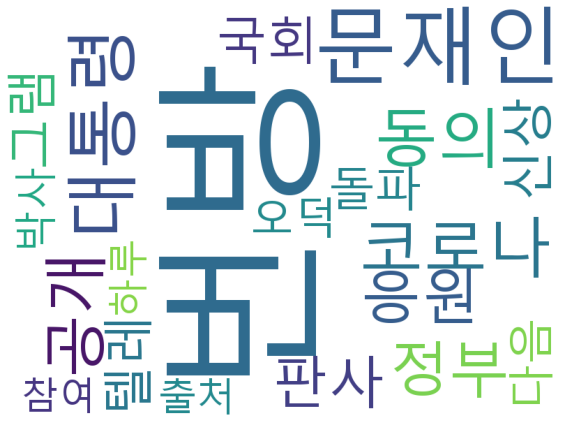

,0,기간
0,번방,기간_B
1,번방,기간_B
2,번방,기간_B
3,번방,기간_B
4,번방,기간_B
...,...,...
6163,참여,기간_B
6164,참여,기간_B
6165,참여,기간_B
6166,참여,기간_B



안전/환경 분야의 청원 완료일 +1일 부터 +30일까지(기간C) 1532건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,동의,답변,승인,장애인,채널,조선,취소,알맹이,대통령,사설
1,126,119,98,97,86,85,81,79,78,77


,10,11,12,13,14,15,16,17,18,19
0,교사,단독,출처,달라,다음,돌파,파면,투표,등교,네이버
1,74,73,68,65,63,62,61,60,59,59


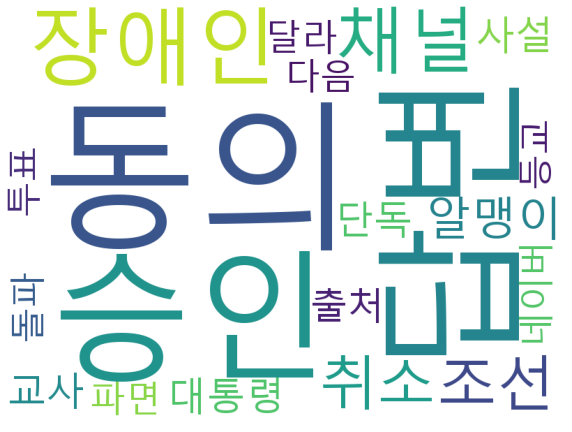

,0,기간
0,동의,기간_C
1,동의,기간_C
2,동의,기간_C
3,동의,기간_C
4,동의,기간_C
...,...,...
1565,네이버,기간_C
1566,네이버,기간_C
1567,네이버,기간_C
1568,네이버,기간_C


,기간,단어
0,기간_A,문재인
1,기간_A,문재인
2,기간_A,문재인
3,기간_A,문재인
4,기간_A,문재인
...,...,...
1565,기간_C,네이버
1566,기간_C,네이버
1567,기간_C,네이버
1568,기간_C,네이버


In [7]:
# 경제민주화
wc_0908(df,df_sns,"안전/환경")

,Num,Class,Title,Date,Support
3,454158,기타,문재인 대통령님을 응원 합니다!,2020-03-27,1504597


3   2020-01-26
Name: Date, dtype: datetime64[ns]

3   2020-02-25
Name: Date, dtype: datetime64[ns]

3   2020-03-27
Name: Date, dtype: datetime64[ns]

3   2020-04-27
Name: Date, dtype: datetime64[ns]


기타 분야의 청원 작성일 -1일 부터 -30일까지(기간A) 1333건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,금지,입국,중국인,신천지,해체,강제,문화,예술의전당,대구,코로나
1,289,286,276,261,169,129,83,81,79,69


,10,11,12,13,14,15,16,17,18,19
0,경북,사회,우한,폐렴,확산,진자,코로나바이러스,지금,새누리당,중국
1,51,49,49,47,40,34,34,32,32,29


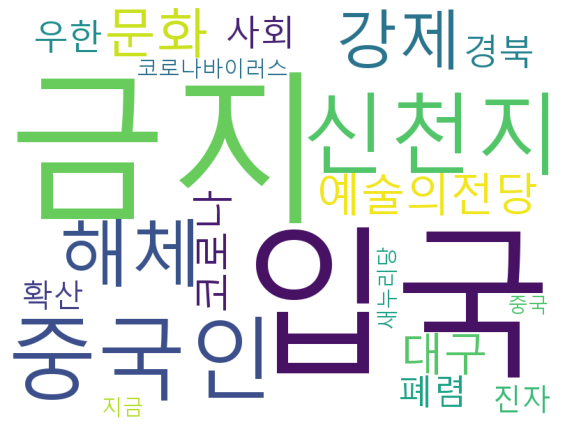

,0,기간
0,금지,기간_A
1,금지,기간_A
2,금지,기간_A
3,금지,기간_A
4,금지,기간_A
...,...,...
2114,중국,기간_A
2115,중국,기간_A
2116,중국,기간_A
2117,중국,기간_A



기타 분야의 청원 작성일 당일 부터 +30일까지(기간B) 4648건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,문재인,대통령,응원,코로나,탄핵,신천지,대구,정부,번방,돌파
1,1880,1591,925,916,908,818,653,580,556,496


,10,11,12,13,14,15,16,17,18,19
0,공개,출처,동의,네이버,확진,진자,사태,경북,다음,사망
1,385,373,365,349,328,306,303,289,285,275


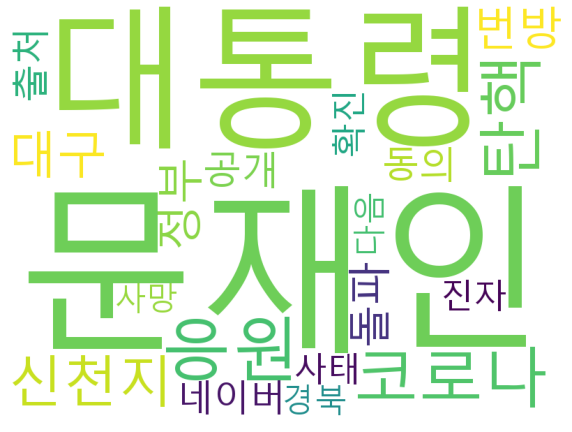

,0,기간
0,문재인,기간_B
1,문재인,기간_B
2,문재인,기간_B
3,문재인,기간_B
4,문재인,기간_B
...,...,...
12576,사망,기간_B
12577,사망,기간_B
12578,사망,기간_B
12579,사망,기간_B



기타 분야의 청원 완료일 +1일 부터 +30일까지(기간C) 1903건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,번방,동의,판사,승인,다음,오덕,답변,채널,조선,취소
1,251,204,193,147,145,139,135,128,120,119


,10,11,12,13,14,15,16,17,18,19
0,코로나,국회,출처,재판,돌파,장애인,네이버,알맹이,세월호,하루
1,118,101,101,99,96,90,88,78,77,77


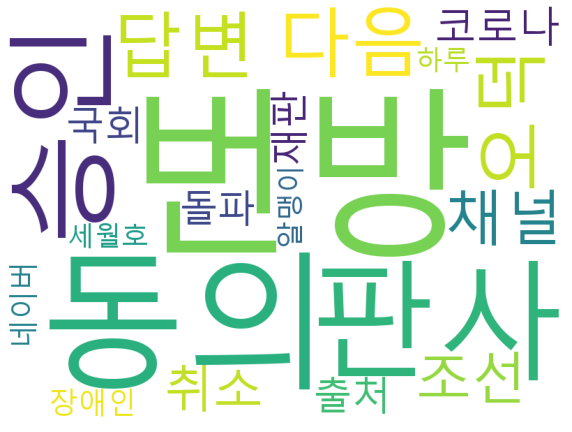

,0,기간
0,번방,기간_C
1,번방,기간_C
2,번방,기간_C
3,번방,기간_C
4,번방,기간_C
...,...,...
2501,하루,기간_C
2502,하루,기간_C
2503,하루,기간_C
2504,하루,기간_C


,기간,단어
0,기간_A,금지
1,기간_A,금지
2,기간_A,금지
3,기간_A,금지
4,기간_A,금지
...,...,...
2501,기간_C,하루
2502,기간_C,하루
2503,기간_C,하루
2504,기간_C,하루


In [8]:
# 기타
wc_0908(df,df_sns,"기타")

,Num,Class,Title,Date,Support
17,454144,문화/예술/체육/언론,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다",2018-03-21,614127


17   2018-01-19
Name: Date, dtype: datetime64[ns]

17   2018-02-18
Name: Date, dtype: datetime64[ns]

17   2018-03-21
Name: Date, dtype: datetime64[ns]

17   2018-04-21
Name: Date, dtype: datetime64[ns]


문화/예술/체육/언론 분야의 청원 작성일 -1일 부터 -30일까지(기간A) 4107건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,파면,강제,개종,답변,판사,육박,정형식,나경원,기록,증발
1,650,636,616,615,613,487,467,466,451,442


,10,11,12,13,14,15,16,17,18,19
0,파장,신상,국회의원,네이버,소통,다음,단독,광장,돌파,시급
1,439,437,315,309,308,298,296,294,284,265


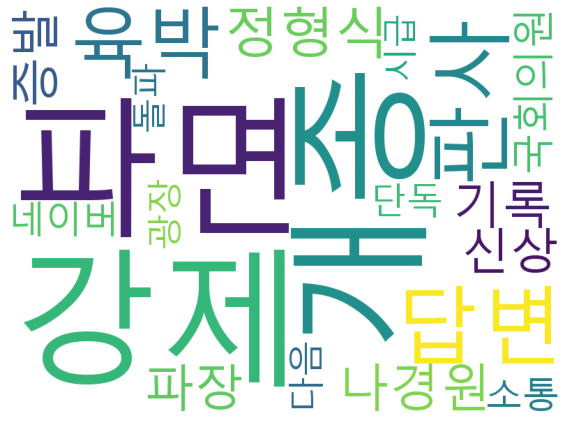

,0,기간
0,파면,기간_A
1,파면,기간_A
2,파면,기간_A
3,파면,기간_A
4,파면,기간_A
...,...,...
8683,시급,기간_A
8684,시급,기간_A
8685,시급,기간_A
8686,시급,기간_A



문화/예술/체육/언론 분야의 청원 작성일 당일 부터 +30일까지(기간B) 4160건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,김보름,박지우,자격,연맹,박탈,빙상,노선영,돌파,적폐,엄중
1,1445,925,702,633,630,584,574,535,488,435


,10,11,12,13,14,15,16,17,18,19
0,선수,소통,메달,광장,현재,시간,추월,천안함,최단,일베
1,374,372,345,326,316,290,282,269,246,229


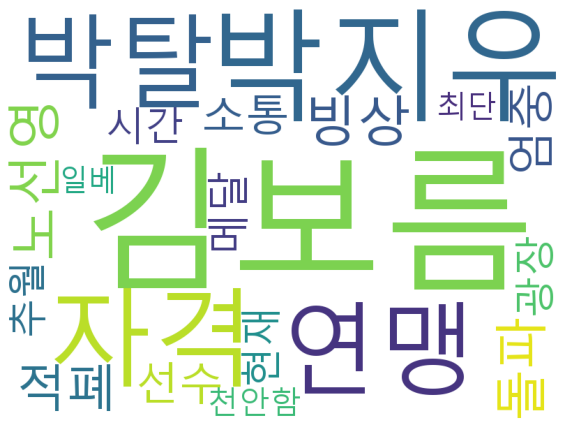

,0,기간
0,김보름,기간_B
1,김보름,기간_B
2,김보름,기간_B
3,김보름,기간_B
4,김보름,기간_B
...,...,...
9995,일베,기간_B
9996,일베,기간_B
9997,일베,기간_B
9998,일베,기간_B



문화/예술/체육/언론 분야의 청원 완료일 +1일 부터 +30일까지(기간C) 3768건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,돌파,다음,대위,여옥,장자연,국회의원,징계,위증,소통,광장
1,549,420,401,400,395,300,291,278,246,239


,10,11,12,13,14,15,16,17,18,19
0,전수,세월호,청문회,출처,동의,네이버,규명,죽음,참여,삼성
1,226,222,219,186,174,172,166,163,154,145


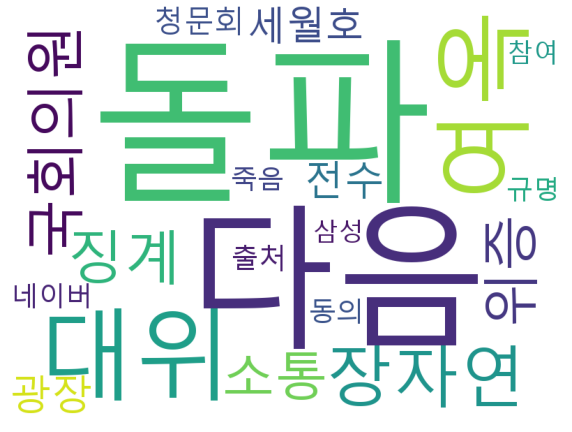

,0,기간
0,돌파,기간_C
1,돌파,기간_C
2,돌파,기간_C
3,돌파,기간_C
4,돌파,기간_C
...,...,...
5341,삼성,기간_C
5342,삼성,기간_C
5343,삼성,기간_C
5344,삼성,기간_C


,기간,단어
0,기간_A,파면
1,기간_A,파면
2,기간_A,파면
3,기간_A,파면
4,기간_A,파면
...,...,...
5341,기간_C,삼성
5342,기간_C,삼성
5343,기간_C,삼성
5344,기간_C,삼성


In [9]:
# 문화/예술/체육/언론
wc_0908(df,df_sns,"문화/예술/체육/언론")

,Num,Class,Title,Date,Support
16,454145,미래,조두순 출소반대,2017-12-05,615354


16   2017-10-05
Name: Date, dtype: datetime64[ns]

16   2017-11-04
Name: Date, dtype: datetime64[ns]

16   2017-12-05
Name: Date, dtype: datetime64[ns]

16   2018-01-05
Name: Date, dtype: datetime64[ns]


미래 분야의 청원 작성일 -1일 부터 -30일까지(기간A) 597건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,동의,요령,접속,촛불,이명박,적폐,제안,정부,추천,청산
1,749,368,368,257,250,244,240,238,233,232


,10,11,12,13,14,15,16,17,18,19
0,정의,실어,구현,광장,소통,폐지,낙태죄,재산,서명,만평
1,229,228,221,195,193,57,39,31,30,25


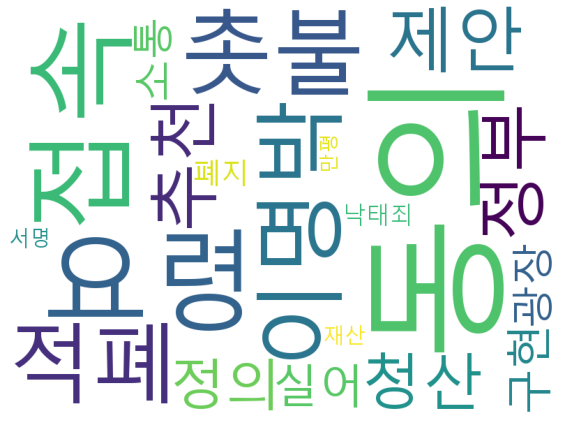

,0,기간
0,동의,기간_A
1,동의,기간_A
2,동의,기간_A
3,동의,기간_A
4,동의,기간_A
...,...,...
4422,만평,기간_A
4423,만평,기간_A
4424,만평,기간_A
4425,만평,기간_A



미래 분야의 청원 작성일 당일 부터 +30일까지(기간B) 1919건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,이명박,소통,대통령,출국금지,광장,적폐,돌파,하루,폐지,다음
1,387,345,317,275,241,237,188,184,184,183


,10,11,12,13,14,15,16,17,18,19
0,답변,출국,출처,네이버,청산,정치,박근혜,참여,동의,조두순
1,174,130,128,128,125,122,121,115,108,107


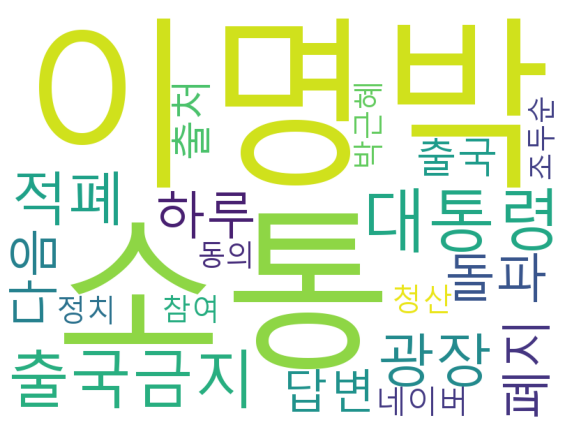

,0,기간
0,이명박,기간_B
1,이명박,기간_B
2,이명박,기간_B
3,이명박,기간_B
4,이명박,기간_B
...,...,...
3794,조두순,기간_B
3795,조두순,기간_B
3796,조두순,기간_B
3797,조두순,기간_B



미래 분야의 청원 완료일 +1일 부터 +30일까지(기간C) 1130건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,소통,광장,문재인,참여,동의,유시민,폐지,답변,조두순,다음
1,117,106,98,90,65,60,54,51,47,45


,10,11,12,13,14,15,16,17,18,19
0,동참,생각,게시판,대통령,소방관,탄핵,전안,경계,제도,자단
1,44,43,40,39,39,38,38,36,36,36


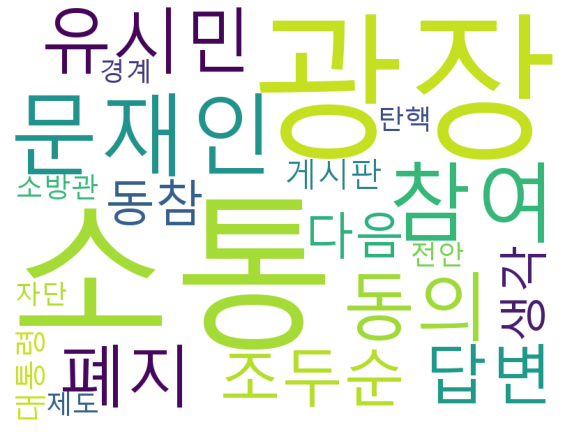

,0,기간
0,소통,기간_C
1,소통,기간_C
2,소통,기간_C
3,소통,기간_C
4,소통,기간_C
...,...,...
1117,자단,기간_C
1118,자단,기간_C
1119,자단,기간_C
1120,자단,기간_C


,기간,단어
0,기간_A,동의
1,기간_A,동의
2,기간_A,동의
3,기간_A,동의
4,기간_A,동의
...,...,...
1117,기간_C,자단
1118,기간_C,자단
1119,기간_C,자단
1120,기간_C,자단


In [10]:
# 미래
wc_0908(df,df_sns,"미래")

,Num,Class,Title,Date,Support
98,454063,반려동물,고양이를 잔혹하게 학대하고 먹는 단체 오픈카톡방 “*****”을 수사하고 처벌하여 ...,2021-02-06,275492


98   2020-12-07
Name: Date, dtype: datetime64[ns]

98   2021-01-06
Name: Date, dtype: datetime64[ns]

98   2021-02-06
Name: Date, dtype: datetime64[ns]

98   2021-03-09
Name: Date, dtype: datetime64[ns]


반려동물 분야의 청원 작성일 -1일 부터 -30일까지(기간A) 2045건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,재판,탄핵,정경,검찰,동의,추미애,다음,윤석열,돌파,신임
1,350,309,251,204,201,196,192,178,153,140


,10,11,12,13,14,15,16,17,18,19
0,해임,검사,로비,출처,대통령,네이버,백신,판사,등장,코로나
1,135,133,128,123,119,115,112,110,100,100


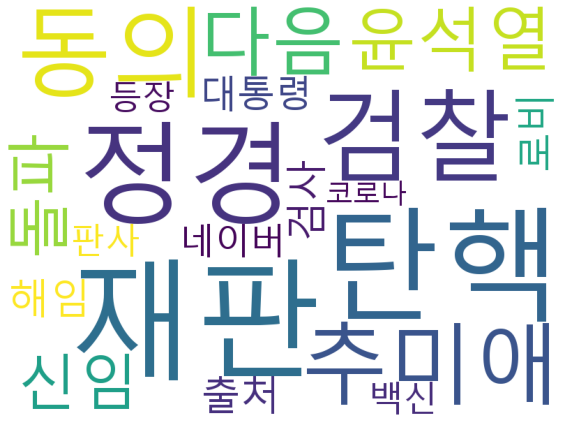

,0,기간
0,재판,기간_A
1,재판,기간_A
2,재판,기간_A
3,재판,기간_A
4,재판,기간_A
...,...,...
3344,코로나,기간_A
3345,코로나,기간_A
3346,코로나,기간_A
3347,코로나,기간_A



반려동물 분야의 청원 작성일 당일 부터 +30일까지(기간B) 1692건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,동의,조작,페스,청년,대학생,대통령,출처,강력범죄,여러분,계정
1,197,101,95,88,88,84,83,80,79,79


,10,11,12,13,14,15,16,17,18,19
0,링크,공유,진짜,네이버,퍼트,페이크,다음,계정은,사회,사람
1,78,75,74,71,69,68,66,60,58,56


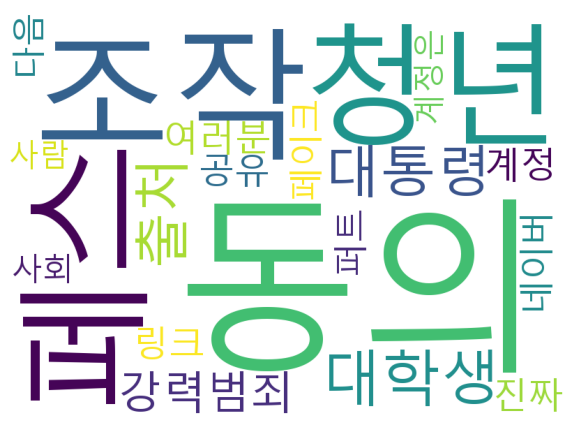

,0,기간
0,동의,기간_B
1,동의,기간_B
2,동의,기간_B
3,동의,기간_B
4,동의,기간_B
...,...,...
1644,사람,기간_B
1645,사람,기간_B
1646,사람,기간_B
1647,사람,기간_B



반려동물 분야의 청원 완료일 +1일 부터 +30일까지(기간C) 1129건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,동의,장애인,대통령,링크,묵살,공유,청년,대학생,조작,다른
1,228,147,124,123,100,81,77,76,76,75


,10,11,12,13,14,15,16,17,18,19
0,다음,긴급,단체,정부,기도,윤정희,검찰,도록,사망,죽음
1,73,72,70,70,69,65,58,55,52,52


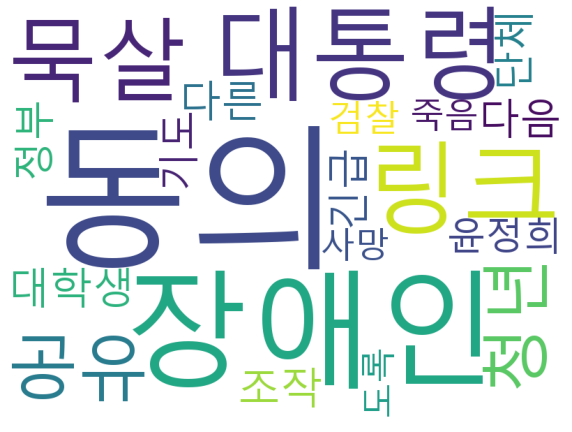

,0,기간
0,동의,기간_C
1,동의,기간_C
2,동의,기간_C
3,동의,기간_C
4,동의,기간_C
...,...,...
1738,죽음,기간_C
1739,죽음,기간_C
1740,죽음,기간_C
1741,죽음,기간_C


,기간,단어
0,기간_A,재판
1,기간_A,재판
2,기간_A,재판
3,기간_A,재판
4,기간_A,재판
...,...,...
1738,기간_C,죽음
1739,기간_C,죽음
1740,기간_C,죽음
1741,기간_C,죽음


In [11]:
# 반려동물
wc_0908(df,df_sns,"반려동물")

,Num,Class,Title,Date,Support
8,454153,보건복지,중국인 입국 금지 요청,2020-02-22,761833


8   2019-12-23
Name: Date, dtype: datetime64[ns]

8   2020-01-22
Name: Date, dtype: datetime64[ns]

8   2020-02-22
Name: Date, dtype: datetime64[ns]

8   2020-03-24
Name: Date, dtype: datetime64[ns]


보건복지 분야의 청원 작성일 -1일 부터 -30일까지(기간A) 3036건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,전광훈,한기총,구속,해산,수사,윤석열,조국,해체,인권,검찰
1,1445,1362,1319,1286,212,200,135,118,93,89


,10,11,12,13,14,15,16,17,18,19
0,하나님,침해,목사,막말,음원,성폭력,사회,인권위,검찰총장,동의
1,85,84,81,55,48,47,45,45,43,39


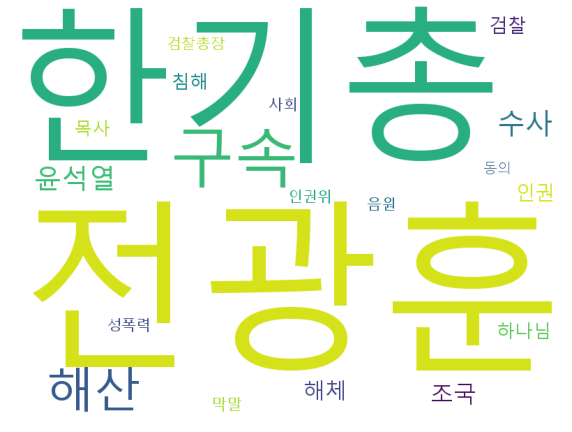

,0,기간
0,전광훈,기간_A
1,전광훈,기간_A
2,전광훈,기간_A
3,전광훈,기간_A
4,전광훈,기간_A
...,...,...
6826,동의,기간_A
6827,동의,기간_A
6828,동의,기간_A
6829,동의,기간_A



보건복지 분야의 청원 작성일 당일 부터 +30일까지(기간B) 1197건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,금지,입국,중국인,문화,예술의전당,사회,우한,코로나,폐렴,코로나바이러스
1,265,262,254,80,78,62,50,48,48,33


,10,11,12,13,14,15,16,17,18,19
0,확산,성폭력,신천지,지금,중국,번방,대구,신종,진짜,문재인
1,33,33,31,30,28,26,25,25,21,21


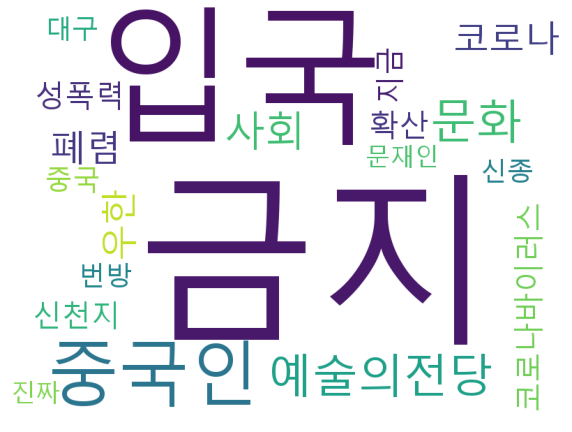

,0,기간
0,금지,기간_B
1,금지,기간_B
2,금지,기간_B
3,금지,기간_B
4,금지,기간_B
...,...,...
1448,문재인,기간_B
1449,문재인,기간_B
1450,문재인,기간_B
1451,문재인,기간_B



보건복지 분야의 청원 완료일 +1일 부터 +30일까지(기간C) 4511건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,문재인,대통령,신천지,탄핵,응원,코로나,대구,정부,돌파,번방
1,1763,1501,1047,908,871,851,696,531,471,457


,10,11,12,13,14,15,16,17,18,19
0,공개,출처,경북,네이버,동의,해체,확진,사태,진자,사망
1,363,349,339,328,327,325,313,301,292,265


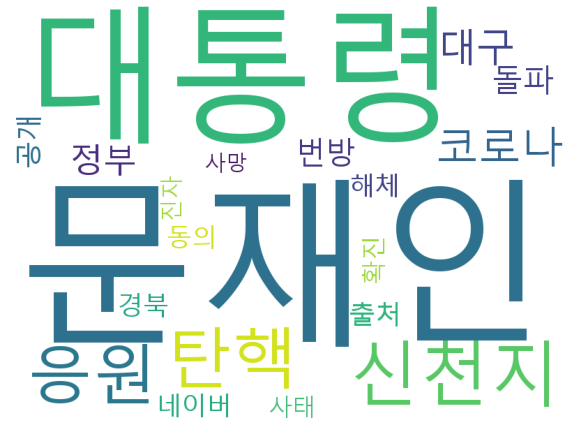

,0,기간
0,문재인,기간_C
1,문재인,기간_C
2,문재인,기간_C
3,문재인,기간_C
4,문재인,기간_C
...,...,...
12293,사망,기간_C
12294,사망,기간_C
12295,사망,기간_C
12296,사망,기간_C


,기간,단어
0,기간_A,전광훈
1,기간_A,전광훈
2,기간_A,전광훈
3,기간_A,전광훈
4,기간_A,전광훈
...,...,...
12293,기간_C,사망
12294,기간_C,사망
12295,기간_C,사망
12296,기간_C,사망


In [12]:
# 보건복지
wc_0908(df,df_sns,"보건복지")

,Num,Class,Title,Date,Support
121,454040,성장동력,전안법 합리적으로 개정 또는 폐지해주세요.(소상공인 소비자 모두 죽는법안입니다.),2018-01-02,255554


121   2017-11-02
Name: Date, dtype: datetime64[ns]

121   2017-12-02
Name: Date, dtype: datetime64[ns]

121   2018-01-02
Name: Date, dtype: datetime64[ns]

121   2018-02-02
Name: Date, dtype: datetime64[ns]


성장동력 분야의 청원 작성일 -1일 부터 -30일까지(기간A) 1737건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,이명박,소통,대통령,출국금지,광장,적폐,하루,다음,답변,돌파
1,387,345,315,275,242,236,183,183,169,161


,10,11,12,13,14,15,16,17,18,19
0,폐지,출국,청산,박근혜,정치,출처,네이버,참여,접속,절대로
1,131,130,125,121,118,111,110,109,107,105


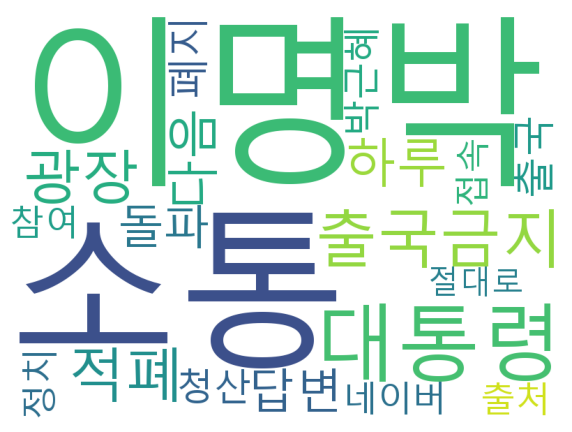

,0,기간
0,이명박,기간_A
1,이명박,기간_A
2,이명박,기간_A
3,이명박,기간_A
4,이명박,기간_A
...,...,...
3658,절대로,기간_A
3659,절대로,기간_A
3660,절대로,기간_A
3661,절대로,기간_A



성장동력 분야의 청원 작성일 당일 부터 +30일까지(기간B) 1246건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,소통,폐지,광장,참여,문재인,동의,조두순,유시민,답변,네이버
1,111,103,99,94,75,61,61,60,56,50


,10,11,12,13,14,15,16,17,18,19
0,출처,생각,다음,돌파,서명,동참,게시판,감형,국회,경계
1,49,48,46,45,44,44,42,40,40,39


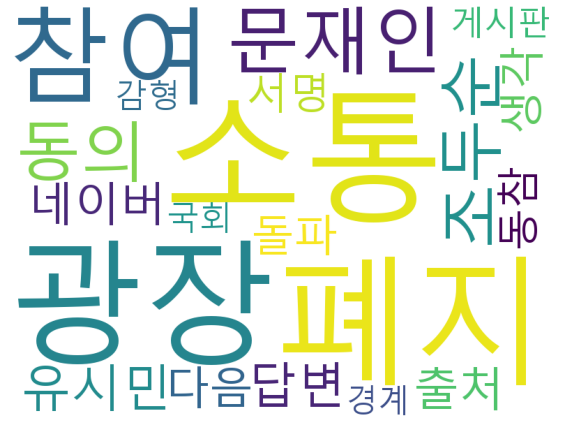

,0,기간
0,소통,기간_B
1,소통,기간_B
2,소통,기간_B
3,소통,기간_B
4,소통,기간_B
...,...,...
1202,경계,기간_B
1203,경계,기간_B
1204,경계,기간_B
1205,경계,기간_B



성장동력 분야의 청원 완료일 +1일 부터 +30일까지(기간C) 2714건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,강제,개종,답변,육박,기록,증발,파장,신상,나경원,파면
1,570,558,509,466,448,442,438,437,431,331


,10,11,12,13,14,15,16,17,18,19
0,단독,위원,소통,화폐,광장,가상,천지일보,여상규,돌파,네이버
1,294,212,200,200,194,180,162,156,155,132


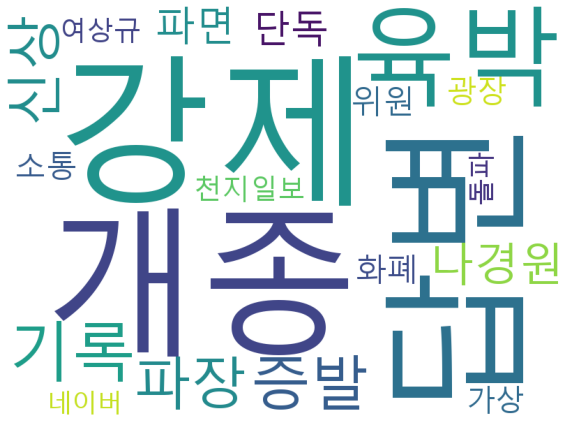

,0,기간
0,강제,기간_C
1,강제,기간_C
2,강제,기간_C
3,강제,기간_C
4,강제,기간_C
...,...,...
6510,네이버,기간_C
6511,네이버,기간_C
6512,네이버,기간_C
6513,네이버,기간_C


,기간,단어
0,기간_A,이명박
1,기간_A,이명박
2,기간_A,이명박
3,기간_A,이명박
4,기간_A,이명박
...,...,...
6510,기간_C,네이버
6511,기간_C,네이버
6512,기간_C,네이버
6513,기간_C,네이버


In [13]:
# 성장동력
wc_0908(df,df_sns,"성장동력")

,Num,Class,Title,Date,Support
0,454161,안전/환경,텔레그램 n번방 용의자 신상공개 및 포토라인 세워주세요,2020-04-17,2715626


0   2020-02-16
Name: Date, dtype: datetime64[ns]

0   2020-03-17
Name: Date, dtype: datetime64[ns]

0   2020-04-17
Name: Date, dtype: datetime64[ns]

0   2020-05-18
Name: Date, dtype: datetime64[ns]


안전/환경 분야의 청원 작성일 -1일 부터 -30일까지(기간A) 3377건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,문재인,대통령,신천지,탄핵,대구,코로나,응원,경북,돌파,해체
1,1257,1141,1042,898,699,694,624,340,329,319


,10,11,12,13,14,15,16,17,18,19
0,정부,사태,출처,진자,네이버,확진,중국인,조작,검사,중국
1,300,297,291,273,267,228,213,203,199,198


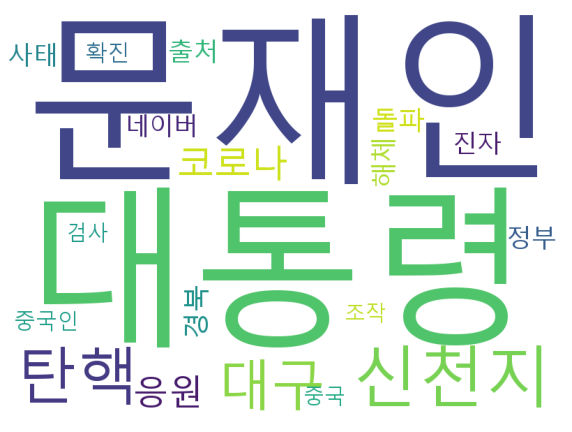

,0,기간
0,문재인,기간_A
1,문재인,기간_A
2,문재인,기간_A
3,문재인,기간_A
4,문재인,기간_A
...,...,...
9807,중국,기간_A
9808,중국,기간_A
9809,중국,기간_A
9810,중국,기간_A



안전/환경 분야의 청원 작성일 당일 부터 +30일까지(기간B) 3037건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,번방,문재인,대통령,코로나,동의,공개,정부,응원,판사,신상
1,791,662,481,375,366,364,325,318,278,245


,10,11,12,13,14,15,16,17,18,19
0,국회,텔레,그램,돌파,다음,오덕,박사,하루,출처,참여
1,235,235,235,223,217,189,183,157,147,142


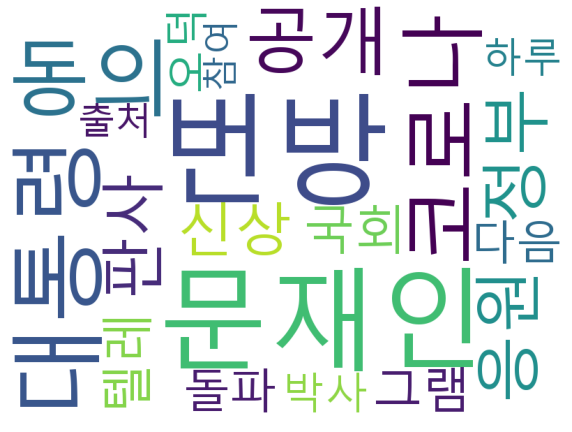

,0,기간
0,번방,기간_B
1,번방,기간_B
2,번방,기간_B
3,번방,기간_B
4,번방,기간_B
...,...,...
6163,참여,기간_B
6164,참여,기간_B
6165,참여,기간_B
6166,참여,기간_B



안전/환경 분야의 청원 완료일 +1일 부터 +30일까지(기간C) 1532건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,동의,답변,승인,장애인,채널,조선,취소,알맹이,대통령,사설
1,126,119,98,97,86,85,81,79,78,77


,10,11,12,13,14,15,16,17,18,19
0,교사,단독,출처,달라,다음,돌파,파면,투표,등교,네이버
1,74,73,68,65,63,62,61,60,59,59


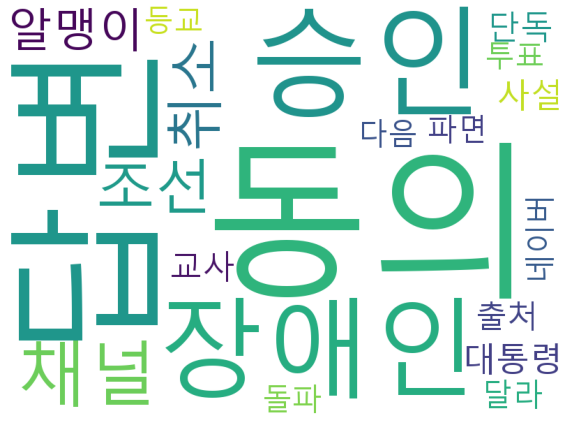

,0,기간
0,동의,기간_C
1,동의,기간_C
2,동의,기간_C
3,동의,기간_C
4,동의,기간_C
...,...,...
1565,네이버,기간_C
1566,네이버,기간_C
1567,네이버,기간_C
1568,네이버,기간_C


,기간,단어
0,기간_A,문재인
1,기간_A,문재인
2,기간_A,문재인
3,기간_A,문재인
4,기간_A,문재인
...,...,...
1565,기간_C,네이버
1566,기간_C,네이버
1567,기간_C,네이버
1568,기간_C,네이버


In [14]:
# 안전/환경
wc_0908(df,df_sns,"안전/환경")

,Num,Class,Title,Date,Support
12,454149,외교/통일/국방,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ...",2018-07-13,714875


12   2018-05-13
Name: Date, dtype: datetime64[ns]

12   2018-06-12
Name: Date, dtype: datetime64[ns]

12   2018-07-13
Name: Date, dtype: datetime64[ns]

12   2018-08-13
Name: Date, dtype: datetime64[ns]


외교/통일/국방 분야의 청원 작성일 -1일 부터 -30일까지(기간A) 2781건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,게시판,대통령,수지,소통,광장,양예원,수사,중단,문재인,매크로
1,267,234,231,188,174,136,129,127,123,116


,10,11,12,13,14,15,16,17,18,19
0,참여,다음,근황,경호,동의,논란,비서,한나라당,전두환,공개
1,115,113,111,109,105,104,102,97,97,88


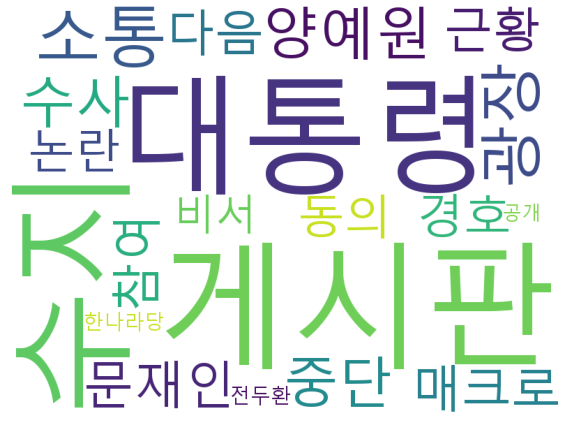

,0,기간
0,게시판,기간_A
1,게시판,기간_A
2,게시판,기간_A
3,게시판,기간_A
4,게시판,기간_A
...,...,...
2761,공개,기간_A
2762,공개,기간_A
2763,공개,기간_A
2764,공개,기간_A



외교/통일/국방 분야의 청원 작성일 당일 부터 +30일까지(기간B) 1763건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,광장,소통,대법원,참여,난민,나라,현재,강제,개종,강탈
1,244,230,228,187,185,142,128,127,123,123


,10,11,12,13,14,15,16,17,18,19
0,시작,인원,수십,개인,축구,조직,이용,정보,양승태,몰래
1,118,118,116,116,113,113,112,111,109,109


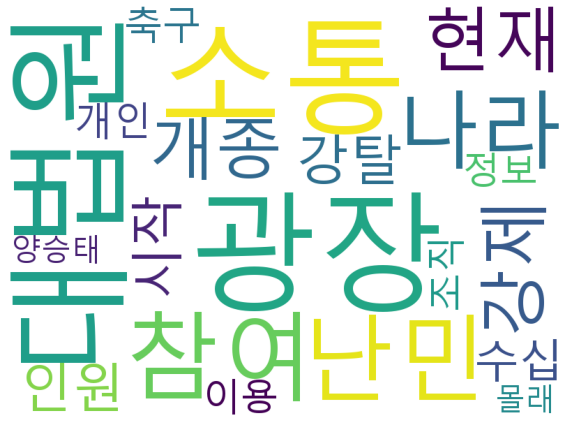

,0,기간
0,광장,기간_B
1,광장,기간_B
2,광장,기간_B
3,광장,기간_B
4,광장,기간_B
...,...,...
2847,몰래,기간_B
2848,몰래,기간_B
2849,몰래,기간_B
2850,몰래,기간_B



외교/통일/국방 분야의 청원 완료일 +1일 부터 +30일까지(기간C) 1627건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,이재명,조폭,은수미,폐지,소통,광장,의혹,연루,참여,대법원
1,398,200,162,161,147,147,139,138,138,128


,10,11,12,13,14,15,16,17,18,19
0,게시판,답변,출처,네이버,국민연금,난민,유착,나라,다음,시작
1,119,98,98,97,92,90,89,86,84,84


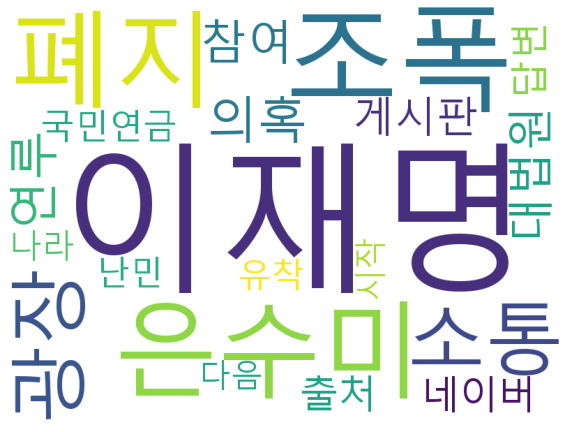

,0,기간
0,이재명,기간_C
1,이재명,기간_C
2,이재명,기간_C
3,이재명,기간_C
4,이재명,기간_C
...,...,...
2690,시작,기간_C
2691,시작,기간_C
2692,시작,기간_C
2693,시작,기간_C


,기간,단어
0,기간_A,게시판
1,기간_A,게시판
2,기간_A,게시판
3,기간_A,게시판
4,기간_A,게시판
...,...,...
2690,기간_C,시작
2691,기간_C,시작
2692,기간_C,시작
2693,기간_C,시작


In [15]:
# 외교/통일/국방
wc_0908(df,df_sns,"외교/통일/국방")

,Num,Class,Title,Date,Support
20,454141,육아/교육,저희 25개월딸이 초등학생 5학년에게 성폭행을 당했습니다,2020-04-19,533883


20   2020-02-18
Name: Date, dtype: datetime64[ns]

20   2020-03-19
Name: Date, dtype: datetime64[ns]

20   2020-04-19
Name: Date, dtype: datetime64[ns]

20   2020-05-20
Name: Date, dtype: datetime64[ns]


육아/교육 분야의 청원 작성일 -1일 부터 -30일까지(기간A) 3496건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,문재인,대통령,신천지,탄핵,코로나,대구,응원,경북,돌파,해체
1,1275,1158,1046,899,717,702,631,340,334,319


,10,11,12,13,14,15,16,17,18,19
0,정부,출처,사태,네이버,진자,확진,중국인,다음,조작,중국
1,309,298,297,278,274,228,215,213,204,200


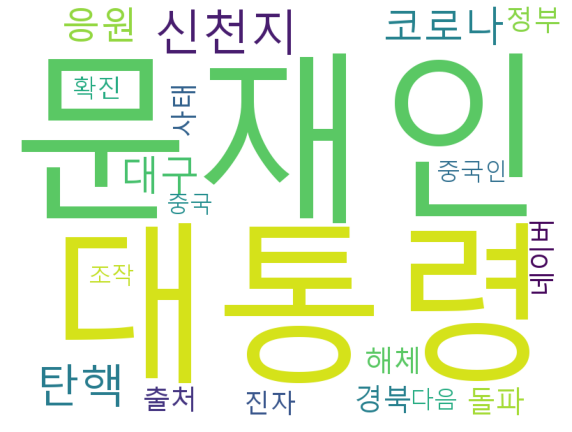

,0,기간
0,문재인,기간_A
1,문재인,기간_A
2,문재인,기간_A
3,문재인,기간_A
4,문재인,기간_A
...,...,...
9932,중국,기간_A
9933,중국,기간_A
9934,중국,기간_A
9935,중국,기간_A



육아/교육 분야의 청원 작성일 당일 부터 +30일까지(기간B) 3012건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,번방,문재인,대통령,공개,동의,코로나,정부,응원,판사,신상
1,782,650,470,357,355,354,317,311,282,240


,10,11,12,13,14,15,16,17,18,19
0,돌파,국회,텔레,그램,다음,오덕,박사,하루,출처,재판
1,239,239,229,229,201,189,177,161,144,144


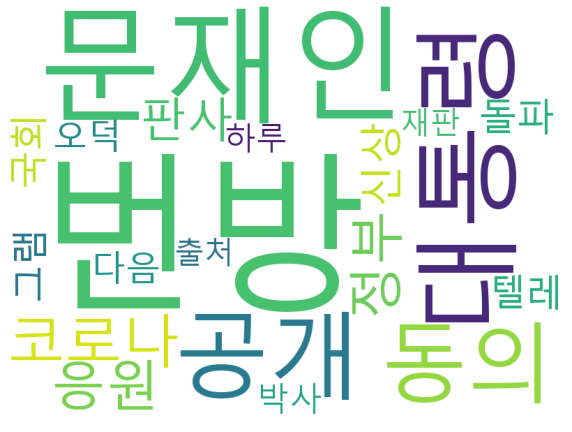

,0,기간
0,번방,기간_B
1,번방,기간_B
2,번방,기간_B
3,번방,기간_B
4,번방,기간_B
...,...,...
6065,재판,기간_B
6066,재판,기간_B
6067,재판,기간_B
6068,재판,기간_B



육아/교육 분야의 청원 완료일 +1일 부터 +30일까지(기간C) 1636건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,동의,답변,출처,장애인,대통령,알맹이,네이버,사설,개월,교사
1,141,123,85,84,79,79,77,77,75,74


,10,11,12,13,14,15,16,17,18,19
0,사람,단독,달라,등교,다음,성폭행,거짓,파면,투표,우리
1,73,73,71,65,63,62,61,61,60,56


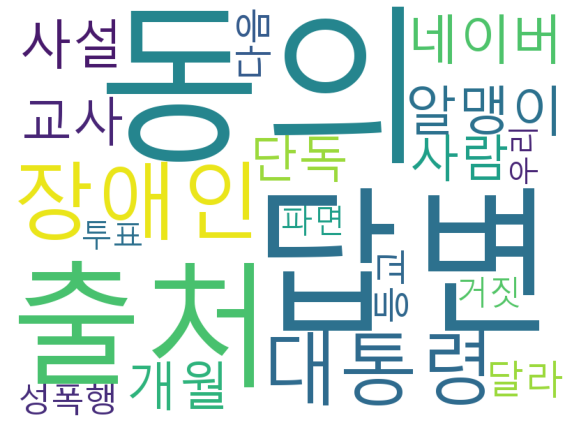

,0,기간
0,동의,기간_C
1,동의,기간_C
2,동의,기간_C
3,동의,기간_C
4,동의,기간_C
...,...,...
1534,우리,기간_C
1535,우리,기간_C
1536,우리,기간_C
1537,우리,기간_C


,기간,단어
0,기간_A,문재인
1,기간_A,문재인
2,기간_A,문재인
3,기간_A,문재인
4,기간_A,문재인
...,...,...
1534,기간_C,우리
1535,기간_C,우리
1536,기간_C,우리
1537,기간_C,우리


In [16]:
# 육아/교육
wc_0908(df,df_sns,"육아/교육")

,Num,Class,Title,Date,Support
5,454156,인권/성평등,"신천지 예수교 증거장막성전(이하, 신천지)의 강제 해체(해산)을 청원합니다.",2020-03-23,1449521


5   2020-01-22
Name: Date, dtype: datetime64[ns]

5   2020-02-21
Name: Date, dtype: datetime64[ns]

5   2020-03-23
Name: Date, dtype: datetime64[ns]

5   2020-04-23
Name: Date, dtype: datetime64[ns]


인권/성평등 분야의 청원 작성일 -1일 부터 -30일까지(기간A) 1221건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,금지,입국,중국인,사회,문화,예술의전당,우한,폐렴,코로나,수사
1,245,242,235,67,65,63,49,48,44,40


,10,11,12,13,14,15,16,17,18,19
0,성폭력,윤석열,코로나바이러스,확산,번방,신천지,중국,지금,신종,진짜
1,38,34,33,33,32,27,27,25,25,23


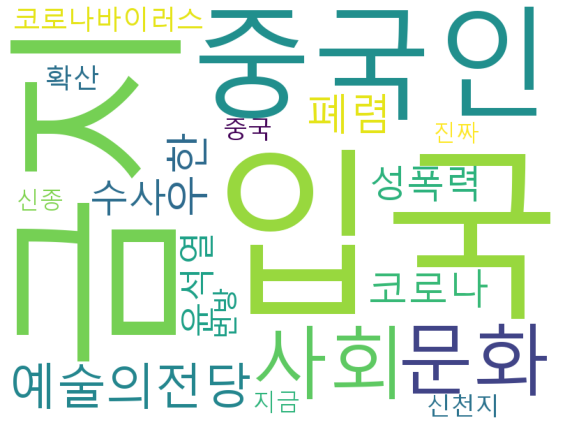

,0,기간
0,금지,기간_A
1,금지,기간_A
2,금지,기간_A
3,금지,기간_A
4,금지,기간_A
...,...,...
1390,진짜,기간_A
1391,진짜,기간_A
1392,진짜,기간_A
1393,진짜,기간_A



인권/성평등 분야의 청원 작성일 당일 부터 +30일까지(기간B) 4316건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,문재인,대통령,신천지,탄핵,응원,코로나,대구,정부,돌파,번방
1,1683,1444,1050,905,827,825,699,489,454,387


,10,11,12,13,14,15,16,17,18,19
0,출처,경북,공개,해체,네이버,사태,동의,진자,확진,중국
1,340,339,329,327,320,299,295,281,280,247


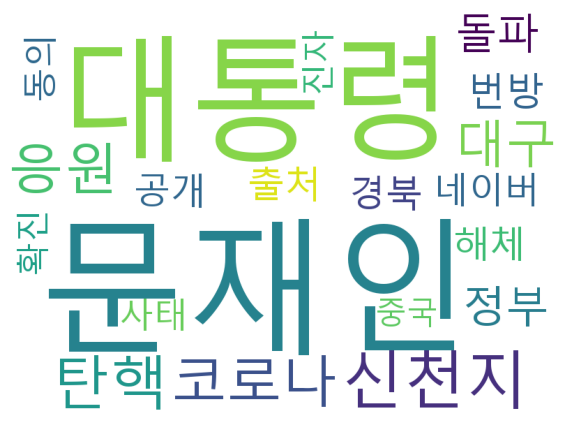

,0,기간
0,문재인,기간_B
1,문재인,기간_B
2,문재인,기간_B
3,문재인,기간_B
4,문재인,기간_B
...,...,...
11815,중국,기간_B
11816,중국,기간_B
11817,중국,기간_B
11818,중국,기간_B



인권/성평등 분야의 청원 완료일 +1일 부터 +30일까지(기간C) 2331건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,번방,판사,동의,문재인,코로나,대통령,오덕,다음,국회,승인
1,417,280,253,236,227,189,189,185,155,148


,10,11,12,13,14,15,16,17,18,19
0,재판,정부,돌파,하루,채널,출처,조선,취소,응원,네이버
1,143,141,139,128,128,126,121,121,117,113


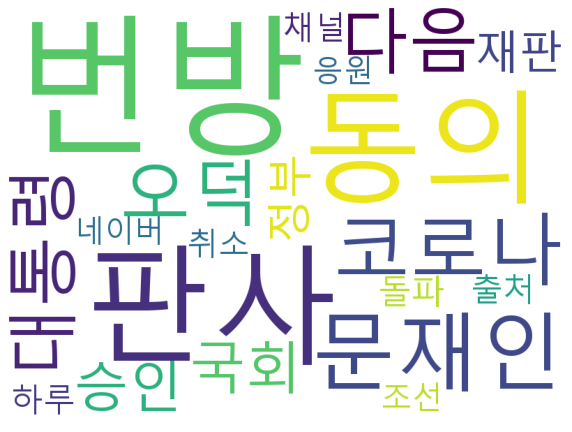

,0,기간
0,번방,기간_C
1,번방,기간_C
2,번방,기간_C
3,번방,기간_C
4,번방,기간_C
...,...,...
3551,네이버,기간_C
3552,네이버,기간_C
3553,네이버,기간_C
3554,네이버,기간_C


,기간,단어
0,기간_A,금지
1,기간_A,금지
2,기간_A,금지
3,기간_A,금지
4,기간_A,금지
...,...,...
3551,기간_C,네이버
3552,기간_C,네이버
3553,기간_C,네이버
3554,기간_C,네이버


In [17]:
# 인권/성평등
wc_0908(df,df_sns,"인권/성평등")

,Num,Class,Title,Date,Support
49,454112,일자리,한전 사업에 중국 기업의 참여를 허락하는 것은 말도 안됩니다.,2020-03-27,383039


49   2020-01-26
Name: Date, dtype: datetime64[ns]

49   2020-02-25
Name: Date, dtype: datetime64[ns]

49   2020-03-27
Name: Date, dtype: datetime64[ns]

49   2020-04-27
Name: Date, dtype: datetime64[ns]


일자리 분야의 청원 작성일 -1일 부터 -30일까지(기간A) 1333건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,금지,입국,중국인,신천지,해체,강제,문화,예술의전당,대구,코로나
1,289,286,276,261,169,129,83,81,79,69


,10,11,12,13,14,15,16,17,18,19
0,경북,사회,우한,폐렴,확산,진자,코로나바이러스,지금,새누리당,중국
1,51,49,49,47,40,34,34,32,32,29


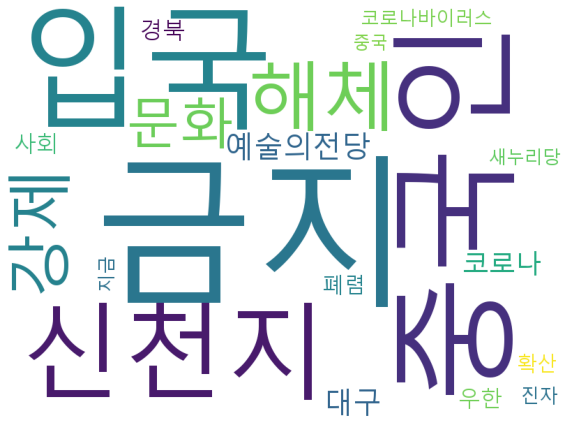

,0,기간
0,금지,기간_A
1,금지,기간_A
2,금지,기간_A
3,금지,기간_A
4,금지,기간_A
...,...,...
2114,중국,기간_A
2115,중국,기간_A
2116,중국,기간_A
2117,중국,기간_A



일자리 분야의 청원 작성일 당일 부터 +30일까지(기간B) 4648건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,문재인,대통령,응원,코로나,탄핵,신천지,대구,정부,번방,돌파
1,1880,1591,925,916,908,818,653,580,556,496


,10,11,12,13,14,15,16,17,18,19
0,공개,출처,동의,네이버,확진,진자,사태,경북,다음,사망
1,385,373,365,349,328,306,303,289,285,275


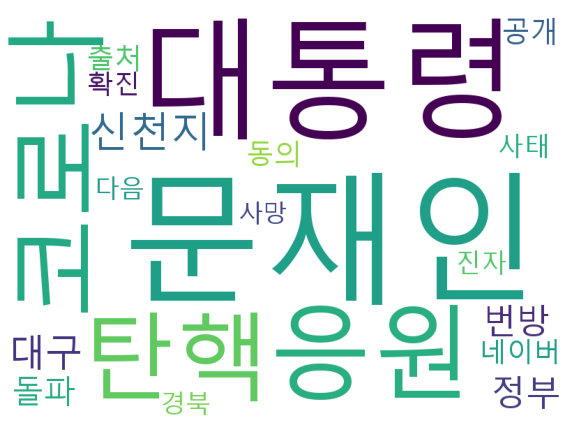

,0,기간
0,문재인,기간_B
1,문재인,기간_B
2,문재인,기간_B
3,문재인,기간_B
4,문재인,기간_B
...,...,...
12576,사망,기간_B
12577,사망,기간_B
12578,사망,기간_B
12579,사망,기간_B



일자리 분야의 청원 완료일 +1일 부터 +30일까지(기간C) 1903건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,번방,동의,판사,승인,다음,오덕,답변,채널,조선,취소
1,251,204,193,147,145,139,135,128,120,119


,10,11,12,13,14,15,16,17,18,19
0,코로나,국회,출처,재판,돌파,장애인,네이버,알맹이,세월호,하루
1,118,101,101,99,96,90,88,78,77,77


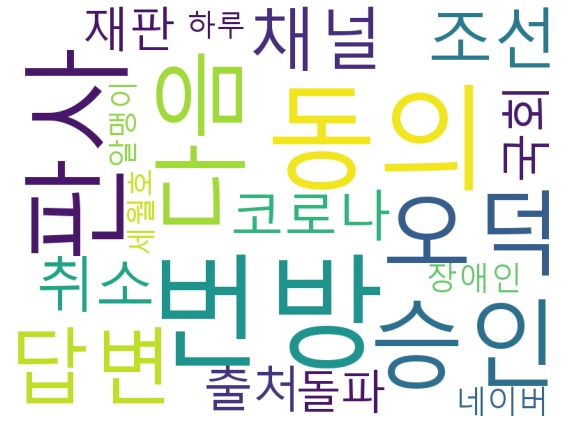

,0,기간
0,번방,기간_C
1,번방,기간_C
2,번방,기간_C
3,번방,기간_C
4,번방,기간_C
...,...,...
2501,하루,기간_C
2502,하루,기간_C
2503,하루,기간_C
2504,하루,기간_C


,기간,단어
0,기간_A,금지
1,기간_A,금지
2,기간_A,금지
3,기간_A,금지
4,기간_A,금지
...,...,...
2501,기간_C,하루
2502,기간_C,하루
2503,기간_C,하루
2504,기간_C,하루


In [18]:
# 일자리
wc_0908(df,df_sns,"일자리")

,Num,Class,Title,Date,Support
2,454159,정치개혁,자유 한국당 정당해산 청원,2019-05-22,1831900


2   2019-03-22
Name: Date, dtype: datetime64[ns]

2   2019-04-21
Name: Date, dtype: datetime64[ns]

2   2019-05-22
Name: Date, dtype: datetime64[ns]

2   2019-06-22
Name: Date, dtype: datetime64[ns]


정치개혁 분야의 청원 작성일 -1일 부터 -30일까지(기간A) 1470건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,세월호,설치,특별,참사,윤지오,사단,연합뉴스,수사,동의,폐지
1,339,234,211,205,198,191,185,161,160,137


,10,11,12,13,14,15,16,17,18,19
0,국가,전면,경찰,돌파,참여,지원,신변,대통령,소방관,서명
1,137,131,120,106,101,93,86,84,84,81


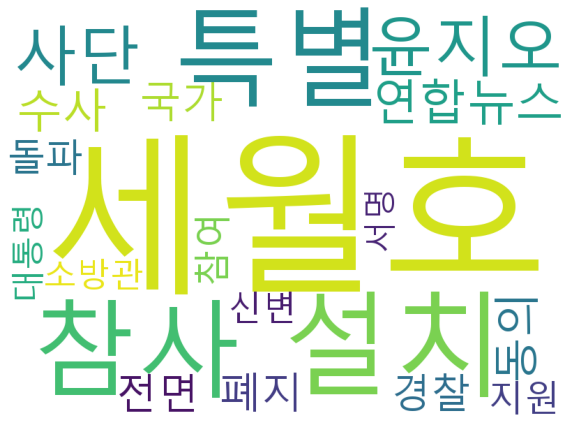

,0,기간
0,세월호,기간_A
1,세월호,기간_A
2,세월호,기간_A
3,세월호,기간_A
4,세월호,기간_A
...,...,...
3039,서명,기간_A
3040,서명,기간_A
3041,서명,기간_A
3042,서명,기간_A



정치개혁 분야의 청원 작성일 당일 부터 +30일까지(기간B) 6387건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,해산,자유,돌파,정당,다음,한당,해체,조작,종합,폭발
1,4020,2997,1541,858,788,633,576,513,466,439


,10,11,12,13,14,15,16,17,18,19
0,분노,민주당,동의,김무성,시간,출처,네이버,왜구,촛불,접속
1,423,392,362,362,352,331,330,327,324,318


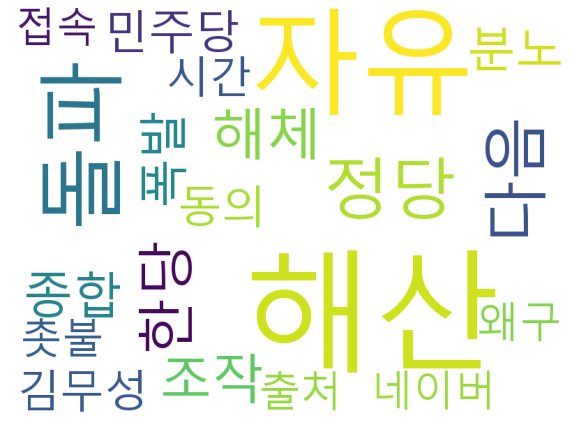

,0,기간
0,해산,기간_B
1,해산,기간_B
2,해산,기간_B
3,해산,기간_B
4,해산,기간_B
...,...,...
16347,접속,기간_B
16348,접속,기간_B
16349,접속,기간_B
16350,접속,기간_B



정치개혁 분야의 청원 완료일 +1일 부터 +30일까지(기간C) 1279건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,답변,대통령,해산,하야,탄핵,다음,문재인,등장,국회,김원봉
1,188,157,119,92,91,90,90,81,78,77


,10,11,12,13,14,15,16,17,18,19
0,의원,한기총,동의,효상,발언,자유,출처,정당,네이버,수사
1,72,71,68,68,65,64,64,63,61,56


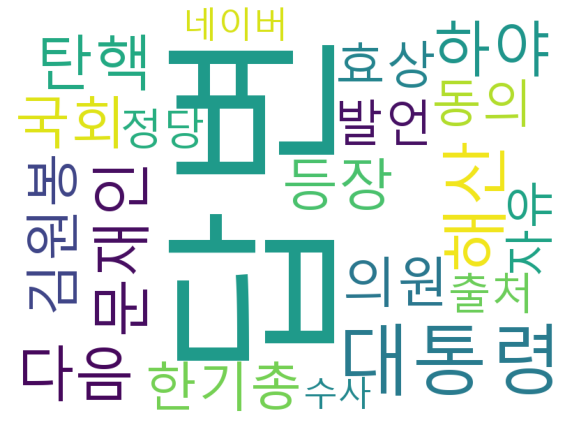

,0,기간
0,답변,기간_C
1,답변,기간_C
2,답변,기간_C
3,답변,기간_C
4,답변,기간_C
...,...,...
1710,수사,기간_C
1711,수사,기간_C
1712,수사,기간_C
1713,수사,기간_C


,기간,단어
0,기간_A,세월호
1,기간_A,세월호
2,기간_A,세월호
3,기간_A,세월호
4,기간_A,세월호
...,...,...
1710,기간_C,수사
1711,기간_C,수사
1712,기간_C,수사
1713,기간_C,수사


In [19]:
# 정치개혁
wc_0908(df,df_sns,"정치개혁")

,Num,Class,Title,Date,Support
34,454127,행정,정부의 교회 정규 예배 이외 행사 금지를 취소해주세요.,2020-08-07,427470


34   2020-06-07
Name: Date, dtype: datetime64[ns]

34   2020-07-07
Name: Date, dtype: datetime64[ns]

34   2020-08-07
Name: Date, dtype: datetime64[ns]

34   2020-09-07
Name: Date, dtype: datetime64[ns]


행정 분야의 청원 작성일 -1일 부터 -30일까지(기간A) 1539건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,택시,동의,기사,박병석,판사,대통령,사퇴,손정우,사람,의장
1,116,110,104,101,98,96,93,83,80,79


,10,11,12,13,14,15,16,17,18,19
0,구급차,진짜,출처,강영수,다음,사법부,네이버,미국,정규직,돌파
1,77,76,70,68,66,64,63,61,60,51


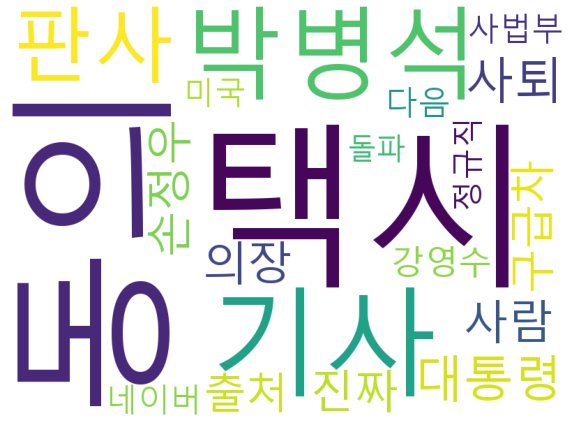

,0,기간
0,택시,기간_A
1,택시,기간_A
2,택시,기간_A
3,택시,기간_A
4,택시,기간_A
...,...,...
1611,돌파,기간_A
1612,돌파,기간_A
1613,돌파,기간_A
1614,돌파,기간_A



행정 분야의 청원 작성일 당일 부터 +30일까지(기간B) 1251건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,박원순,서울특별시,동의,일장,금지,장례,돌파,시장,다음,정부
1,298,201,163,92,84,78,77,76,74,71


,10,11,12,13,14,15,16,17,18,19
0,출처,취소,교회,네이버,사람,현재,문화,등장,행사,예술의전당
1,70,68,68,66,61,57,55,53,52,48


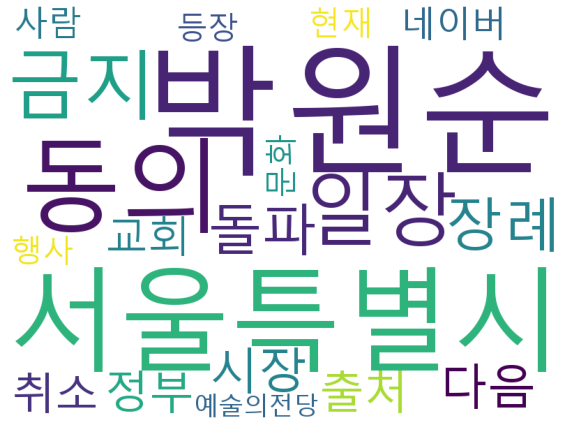

,0,기간
0,박원순,기간_B
1,박원순,기간_B
2,박원순,기간_B
3,박원순,기간_B
4,박원순,기간_B
...,...,...
1807,예술의전당,기간_B
1808,예술의전당,기간_B
1809,예술의전당,기간_B
1810,예술의전당,기간_B



행정 분야의 청원 완료일 +1일 부터 +30일까지(기간C) 3085건 워드클라우드



,0,1,2,3,4,5,6,7,8,9
0,집회,탄핵,추미애,광화문,장관,동의,다음,출처,네이버,판사
1,683,664,656,555,521,436,424,325,296,277


,10,11,12,13,14,15,16,17,18,19
0,의사,돌파,일당,시무,코로나,전광훈,의대,해임,참가자,파업
1,272,266,231,228,216,212,209,208,191,190


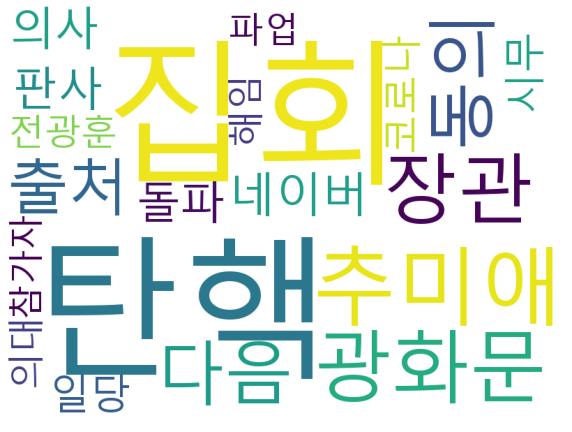

,0,기간
0,집회,기간_C
1,집회,기간_C
2,집회,기간_C
3,집회,기간_C
4,집회,기간_C
...,...,...
7055,파업,기간_C
7056,파업,기간_C
7057,파업,기간_C
7058,파업,기간_C


,기간,단어
0,기간_A,택시
1,기간_A,택시
2,기간_A,택시
3,기간_A,택시
4,기간_A,택시
...,...,...
7055,기간_C,파업
7056,기간_C,파업
7057,기간_C,파업
7058,기간_C,파업


In [20]:
# 행정
wc_0908(df,df_sns,"행정")